In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import math
import mysql.connector

In [2]:
connection = mysql.connector.connect(user='root',password='Aaira2020',host = '127.0.0.1',database = 'MRTSSALES', auth_plugin='mysql_native_password')
cursor = connection.cursor()

In [3]:
sqlStatementDetails = 'SELECT * FROM VW_MRTSALES_DATA;'
sqlStatementTotals = 'SELECT * FROM VW_MRTSALES_DATA_TOTAL;'

In [4]:
cursor.execute(sqlStatementDetails)
detailColumns = cursor.column_names
detailData = cursor.fetchall()

In [5]:
cursor.execute(sqlStatementTotals)
totalColumns = cursor.column_names
totalData = data = cursor.fetchall()

In [6]:
cursor.close()
connection.close()

In [7]:
DetailDataDf = pd.DataFrame(detailData)
DetailDataDf.columns = detailColumns

totalDataDf = pd.DataFrame(totalData)
totalDataDf.columns = totalColumns

uniqueKinds = totalDataDf.KIND_OF_BUSINESS.unique()

totalDataDf.head()
DetailDataDf.head()
uniqueKinds

array(['Retail and food services sales, total',
       'Retail sales and food services excl motor vehicle and parts',
       'Retail sales and food services excl gasoline stations',
       'Retail sales and food services excl motor vehicle and parts and gasoline stations',
       'Retail sales, total',
       'Retail sales, total (excl. motor vehicle and parts dealers)',
       'GAFO(1)'], dtype=object)

In [8]:
totalDataDf.head()
DetailDataDf.head()

,NAICS_CODE,KIND_OF_BUSINESS,ADJUSTMENT_TYPE,VALUE,DATE,YEAR,MONTH
0,441,Motor vehicle and parts dealers,NOT ADJUSTED,104255.0,2021-01-01,2021,1
1,442,Furniture and home furnishings stores,NOT ADJUSTED,10707.0,2021-01-01,2021,1
2,443,Electronics and appliance stores,NOT ADJUSTED,7066.0,2021-01-01,2021,1
3,444,Building mat. and garden equip. and supplies d...,NOT ADJUSTED,31229.0,2021-01-01,2021,1
4,445,Food and beverage stores,NOT ADJUSTED,71726.0,2021-01-01,2021,1


30 7


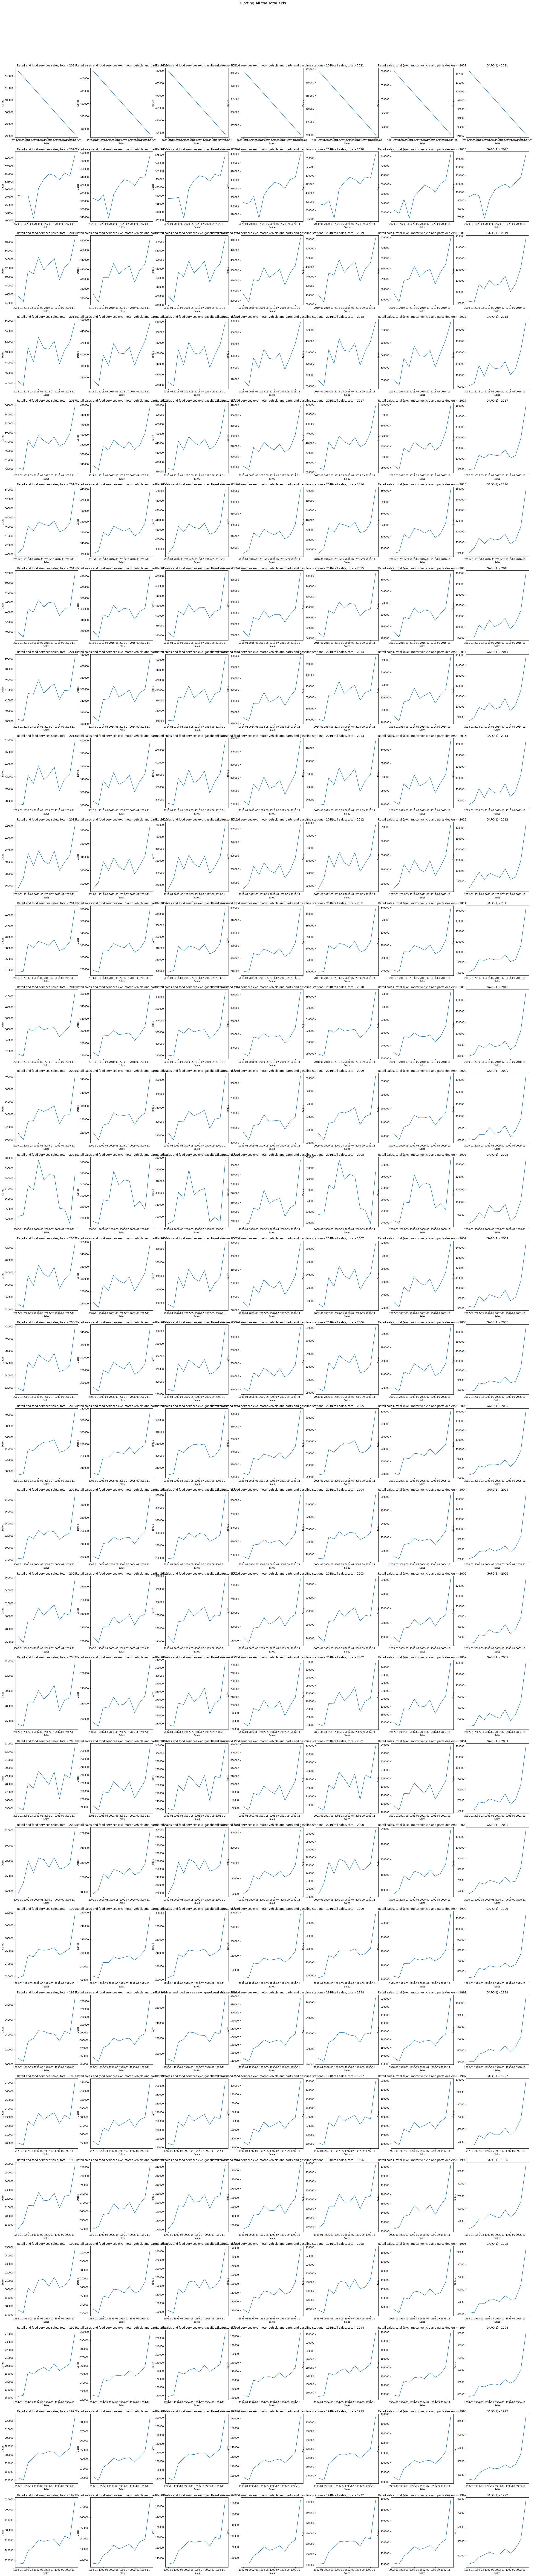

In [9]:
i = 0
j = 0

fig, axs = plt.subplots(len(totalDataDf.YEAR.unique()),len(totalDataDf.KIND_OF_BUSINESS.unique()), figsize=(40, 200))
fig.suptitle(f'Plotting All the Total KPIs ', fontsize = 16, y = 0.9)

for eachYear in totalDataDf.YEAR.unique():
    j = 0
    for eachKind in totalDataDf.KIND_OF_BUSINESS.unique():
        axs[i][j].plot(totalDataDf[(totalDataDf['KIND_OF_BUSINESS']==eachKind) & (totalDataDf['YEAR']==eachYear)]['DATE'], totalDataDf[(totalDataDf['KIND_OF_BUSINESS']==eachKind) & (totalDataDf['YEAR']==eachYear)]['VALUE'])
        axs[i][j].set_title(eachKind, fontsize = 10)
        axs[i][0].set_ylabel('Sales')
        j += 1
        print(i,j,eachYear,eachKind)    
    i += 1

#print(i,j)
        
#plt.show()

In [ ]:
i = 0
j = 0

fig, axs = plt.subplots(len(DetailDataDf.YEAR.unique()),len(DetailDataDf.KIND_OF_BUSINESS.unique()), figsize=(40, 100))
fig.suptitle(f'Plotting All the Total KPIs ', fontsize = 16, y = 0.9)

for eachYear in DetailDataDf.YEAR.unique():
    j = 0
    for eachKind in DetailDataDf.KIND_OF_BUSINESS.unique():
        axs[i][j].plot(DetailDataDf[(DetailDataDf['KIND_OF_BUSINESS']==eachKind) & (DetailDataDf['YEAR']==eachYear)]['DATE'], DetailDataDf[(DetailDataDf['KIND_OF_BUSINESS']==eachKind) & (DetailDataDf['YEAR']==eachYear)]['VALUE'])
        axs[i][j].set_title(eachKind + ' - ' + str(eachYear))
        axs[i][j].set_ylabel('Dates')
        axs[i][j].set_xlabel('Sales')
        j += 1
        #print(eachYear,eachKind)    
    i += 1

print(i,j)
        
#plt.show()

30 13
Error in callback <function _draw_all_if_interactive at 0x000001E0A5AA44C0> (for post_execute):


KeyboardInterrupt: 